<a href="https://colab.research.google.com/github/Kashish-mogha26/PyTorch/blob/master/Linear_regression_using_GD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import numpy as np

In [0]:
class plot_diagram():
    
    # Constructor
    def __init__(self, X, Y, w, stop, go = False):
        start = w.data
        self.error = []
        self.parameter = []
        self.X = X.numpy()
        self.Y = Y.numpy()
        self.parameter_values = torch.arange(start, stop)
        self.Loss_function = [criterion(forward(X), Y) for w.data in self.parameter_values] 
        w.data = start
        
    # Executor
    def __call__(self, Yhat, w, error, n):
        self.error.append(error)
        self.parameter.append(w.data)
        plt.subplot(212)
        plt.plot(self.X, Yhat.detach().numpy())
        plt.plot(self.X, self.Y,'ro')
        plt.xlabel("A")
        plt.ylim(-20, 20)
        plt.subplot(211)
        plt.title("Data Space (top) Estimated Line (bottom) Iteration " + str(n))
        plt.plot(self.parameter_values.numpy(), self.Loss_function)   
        plt.plot(self.parameter, self.error, 'ro')
        plt.xlabel("B")
        plt.figure()
    
    # Destructor
    def __del__(self):
        plt.close('all')

In [0]:
# Create the f(X) with a slope of -3
X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = -3 * X

In [0]:
w=torch.tensor(-10.0,requires_grad=True)

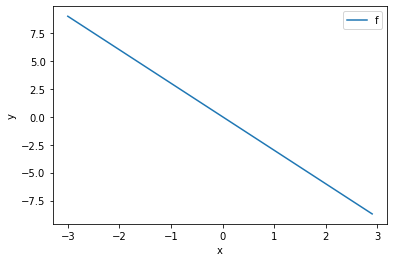

In [25]:
import matplotlib.pyplot as plt
plt.plot(X.numpy(),f.numpy(),label='f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

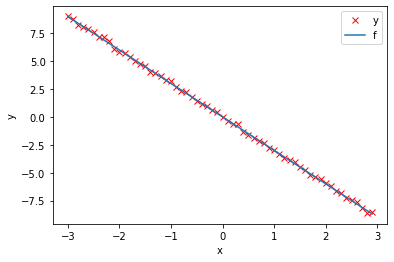

In [26]:
#Add some noise to f(x)
y=f+0.1*torch.randn(X.size())
plt.plot(X.numpy(),y.numpy(),'rx',label='y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [0]:
#Prediction function
def forward(X):
  return w*X

In [0]:
# Create the MSE function for evaluating the result.
def criterion(yhat, y):
    return torch.mean((yhat - y) ** 2)

In [0]:
# Create Learning Rate and an empty list to record the loss for each iteration
lr = 0.1
LOSS = []

In [0]:
gradient_plot = plot_diagram(X, y, w, stop = 5)

In [0]:
# Define a function for train the model

def train_model(iter):
    for epoch in range (iter):
        
        # make the prediction
        Yhat = forward(X)
        
        # calculate the iteration
        loss = criterion(Yhat,y)
        
        # plot the diagram
        gradient_plot(Yhat, w, loss.item(), epoch)
        
        # store the loss into list
        LOSS.append(loss.item())
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters
        w.data = w.data - lr * w.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()

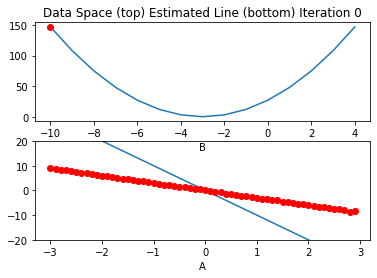

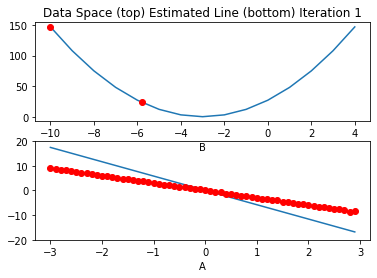

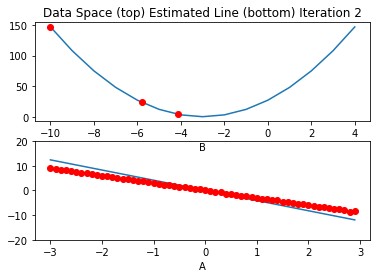

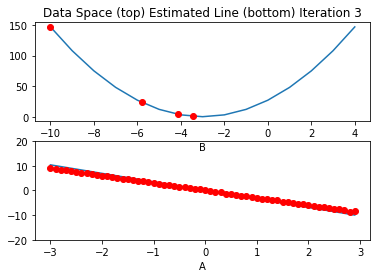

<Figure size 432x288 with 0 Axes>

In [35]:
train_model(4)

Text(24.0, 0.5, 'Cost')

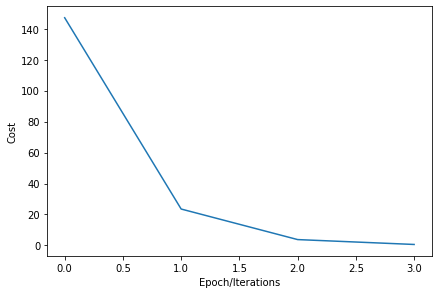

In [36]:
# Plot the loss for each iteration

plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")